In [4]:
import os
import fnmatch
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy as np
current_directory = os.getcwd()
data_directory = current_directory+"\extracted_data\\"

In [32]:
files = []
# files = ["time_intervals_5h_1Hz.txt"] # list of time interval data (file names) that will be concatenated for the histogram. If empty, all time interval files will be concatenated

In [33]:
if len(files) == 0:
    files = fnmatch.filter(os.listdir(data_directory), 'time_interval*')
time_intervals = np.array([])
for file in files:
    ti = np.loadtxt(data_directory+file)
    time_intervals = np.append(time_intervals,ti)

In [7]:
# Exponential function for the fit
def exponential(x,A,tau):
    return A*np.exp(-x/tau)

In [70]:
def print_result_convention(result, result_std, description, variable_name, unit):
    cutoff = 1
    decimal = int(np.log10(abs(result_std)))
    result_std_str = str(round(result_std,-decimal))
    if result_std_str[0] == "1":
        cutoff = 2
        decimal -= 1

    result_str = "{:.{c}}".format(result,c=cutoff)
    result_std_str = "{:.{c}}".format(result_std,c=cutoff)
    if decimal >= 0:
        result = int(float(result_str))
        result_std = int(float(result_std_str))
    print(description + result_str + " \u00B1 " + result_std_str + unit)
    print(int(float(result_std_str)))
    pass

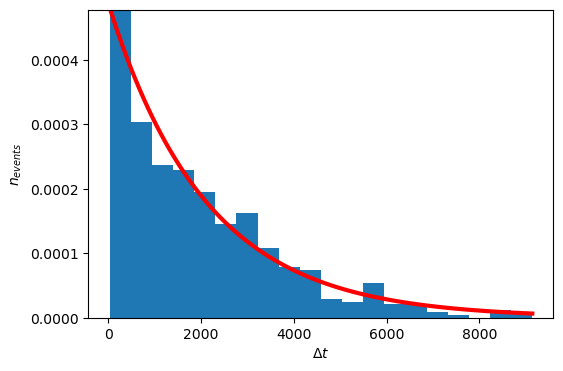

Muon lifetime : τ = 2115.1311403560408 ± 137.86982075865942 ns


In [72]:
# Plot of the distribution of decay time
from scipy.optimize import curve_fit

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
n,bins,_ = ax.hist(time_intervals, 20, density=True)
bins_centers = (bins[1:]+bins[:-1])/2

coeffs, cov = curve_fit(exponential,bins_centers,n,p0=[0.0005,2000])

t = np.linspace(min(time_intervals),max(time_intervals),100)

ax.plot(t, exponential(t,*coeffs), '-r', lw=3)
ax.set_xlabel("$\Delta t$")
ax.set_ylabel("$n_{events}$")
ax.set_ylim(0,max(n))
plt.show()

tau = coeffs[1]
tau_std = np.sqrt(cov[1,1])

print("Muon lifetime : \u03C4 = {} \u00B1 {} ns".format(tau,tau_std))